<a href="https://colab.research.google.com/github/giuliabugatti09/COVID19-Global-Analytics/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados global da COVID-19**

**📊 Sobre o Projeto**

Este projeto tem como objetivo analisar a evolução dos casos de COVID-19 ao redor do mundo, correlacionando com medidas de controle, como lockdowns e campanhas de vacinação. A análise foi realizada utilizando Python e bibliotecas de ciência de dados e visualização, como Pandas, Matplotlib e Seaborn.

**Importando os pacotes necessários**

In [ ]:
# Importando as biblioteca necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
from scipy import stats

%matplotlib inline
# tamanho dos gráficos
plt.rcParams['figure.figsize'] = [10,5]
# tamanho dos dados
plt.rcParams['font.size'] = 12
# tamanho das coluna a exibir os dados
pd.set_option('display.max_rows', 67)

In [ ]:
# importar o dataframe em csv
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

**Análise Exploratória Global**

In [ ]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df.shape[0])
print("Variáveis: ", df.shape[1])

Entradas:  429435
Variáveis:  67


In [ ]:
# Visualizar as 5 primeiras entradas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [ ]:
# Extrair o tipo das variáveis
df.dtypes

,0
iso_code,object
continent,object
location,object
date,object
total_cases,float64
new_cases,float64
new_cases_smoothed,float64
total_deaths,float64
new_deaths,float64
new_deaths_smoothed,float64


In [ ]:
# Extrair o nome das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
# Porcentagem de itens nulos
(df.isnull().sum()/df.shape[0]).sort_values(ascending = True) * 100


,0
iso_code,0.000000
population,0.000000
location,0.000000
date,0.000000
total_cases,4.105627
total_deaths,4.105627
total_cases_per_million,4.105627
total_deaths_per_million,4.105627
new_deaths,4.384133
new_deaths_per_million,4.384133


In [ ]:

# estatística descritiva das colunas
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060828,112096.199420,122.357073,122.713852,835.514337,...,33.097758,50.649390,3.106895,73.702098,0.722178,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666404
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636565,162240.412405,1508.778585,559.701663,1134.932641,...,13.853952,31.905236,2.549168,7.387914,0.149237,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892770
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.190000,0.100000,53.280000,0.390000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.450000
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100000,0.000000,0.000000,24.570000,...,22.600000,20.860000,1.300000,69.500000,0.600000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.875000
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.480000,0.000000,2.790000,295.090000,...,33.100000,49.540000,2.500000,75.050000,0.740000,6.336393e+06,6.815200e+03,8.130000,5.660000,1270.800000
75%,7.582720e+05,0.000000e+00,3.132900e+02,9.574000e+03,0.000000,3.140000,156770.190000,0.000000,56.250000,1283.820000,...,41.500000,82.500000,4.210000,79.460000,0.830000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.025000
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.960000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.520000


In [ ]:
# verificar os dados únicos da variável
df.location.unique()


array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guine

In [ ]:

# verificar as cinco primeiras tuplas cujo iso_code contém 'OWID'
df.loc[df.iso_code.str.contains("OWID")].head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1674,OWID_AFR,NaN,Africa,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1675,OWID_AFR,NaN,Africa,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1676,OWID_AFR,NaN,Africa,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1677,OWID_AFR,NaN,Africa,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1678,OWID_AFR,NaN,Africa,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN


In [ ]:
df_covid = df.copy()
# apagar tuplas nas quais o iso_code contenha "OWID"
df_covid.drop(df_covid.index[df_covid.iso_code.str.contains("OWID")].values, inplace = True)

**5 países com mais casos de Covid-19**

In [ ]:
df_covid.groupby(['location']).total_cases.sum().sort_values(ascending = False)[:5]


,total_cases
location,
United States,1.059145e+11
China,5.978965e+10
India,5.207949e+10
Brazil,4.027447e+10
France,3.527687e+10


,total_cases
location,
United States,14.804838
China,8.357460
India,7.279725
Brazil,5.629608
France,4.931037


**Visualização dos dados**

<ipython-input-24-17e78e3866db>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x, y=y, ax=ax, palette="magma")


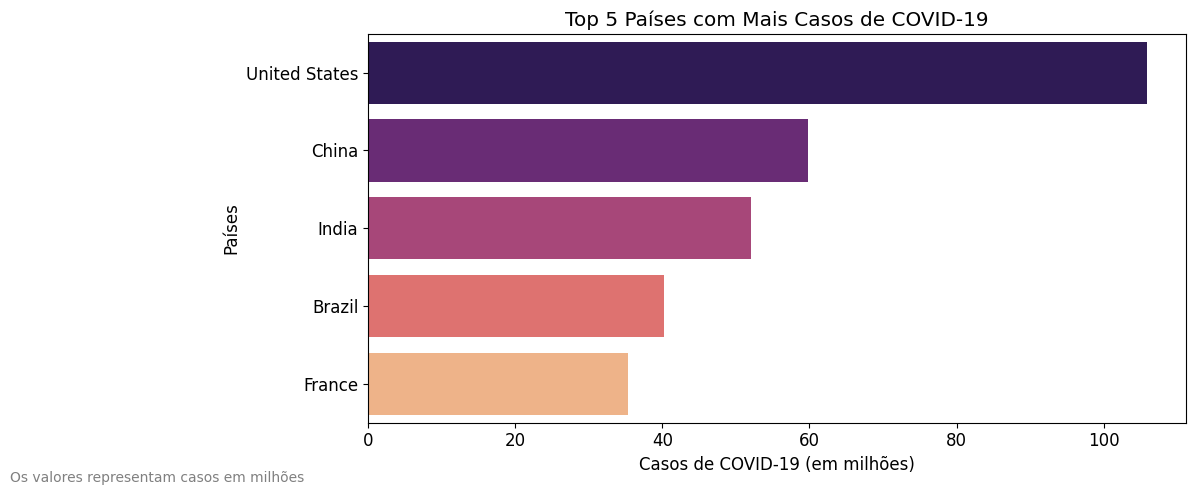

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker  # Para formatar os números

# Criando a figura
fig, ax = plt.subplots()

# Obtendo os valores e índices dos países com mais casos
top_countries = df_covid.groupby('location').total_cases.sum().sort_values(ascending=False)[:5]

# Convertendo os valores para "casos por milhão"
x = top_countries.values / 1_000_000_000
y = top_countries.index

# Criando o gráfico
ax = sns.barplot(x=x, y=y, ax=ax, palette="magma")

# Formatando os números no eixo X
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", ".")))

# Ajustes visuais
ax.grid(False)
ax.set_ylabel('Países')
ax.set_xlabel('Casos de COVID-19 (em milhões)')
ax.set_title("Top 5 Países com Mais Casos de COVID-19")

# Adicionando legenda explicativa
plt.figtext(0.1, 0.02, "Os valores representam casos em milhões", ha="right", fontsize=10, color="gray")

plt.tight_layout()
plt.show()



In [ ]:
# Calcular a soma dos casos dos cinco primeiros países
total_cases_top5 = df_covid.groupby(['location']).total_cases.sum().sort_values(ascending=False)[:5].sum()

# Calcular a soma de todos os casos
total_cases_all = df_covid['total_cases'].sum()

# Calcular a porcentagem
percentage = (total_cases_top5 / total_cases_all) * 100

print(f"A porcentagem que os cinco países com mais casos representam em relação ao restante é: {percentage:.2f}%")

A porcentagem que os cinco países com mais casos representam em relação ao restante é: 41.00%


In [ ]:

df_covid.loc[df_covid.date == last_date].sort_values(by="total_cases", ascending=False).head(5)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
405124,USA,North America,United States,2024-08-04,103436829.0,NaN,NaN,1193165.0,619.0,88.43,...,24.6,NaN,2.77,78.86,0.93,338289856,NaN,NaN,NaN,NaN
75343,CHN,Asia,China,2024-08-04,99373219.0,2087.0,298.14,122304.0,15.0,2.14,...,48.4,NaN,4.34,76.91,0.76,1425887360,NaN,NaN,NaN,NaN
175222,IND,Asia,India,2024-08-04,45041748.0,313.0,44.71,533623.0,0.0,0.00,...,20.6,59.55,0.53,69.66,0.64,1417173120,NaN,NaN,NaN,NaN
132040,FRA,Europe,France,2024-08-04,38997490.0,NaN,NaN,168091.0,NaN,NaN,...,35.6,NaN,5.98,82.66,0.90,67813000,NaN,NaN,NaN,NaN
142084,DEU,Europe,Germany,2024-08-04,38437756.0,NaN,NaN,174979.0,NaN,NaN,...,33.1,NaN,8.00,81.33,0.95,83369840,NaN,NaN,NaN,NaN


In [ ]:
# visualizar os cinco principais países com mais casos na data atual
df_covid.loc[df_covid.date == last_date].groupby(['location']).total_cases.sum().sort_values(ascending = False)[:5]


,total_cases
location,
United States,103436829.0
China,99373219.0
India,45041748.0
France,38997490.0
Germany,38437756.0


**5 países com mais casos até o dia 24/08/2024**

<ipython-input-41-eae4c4716b20>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=x, y=y, ax=ax1, palette="magma")


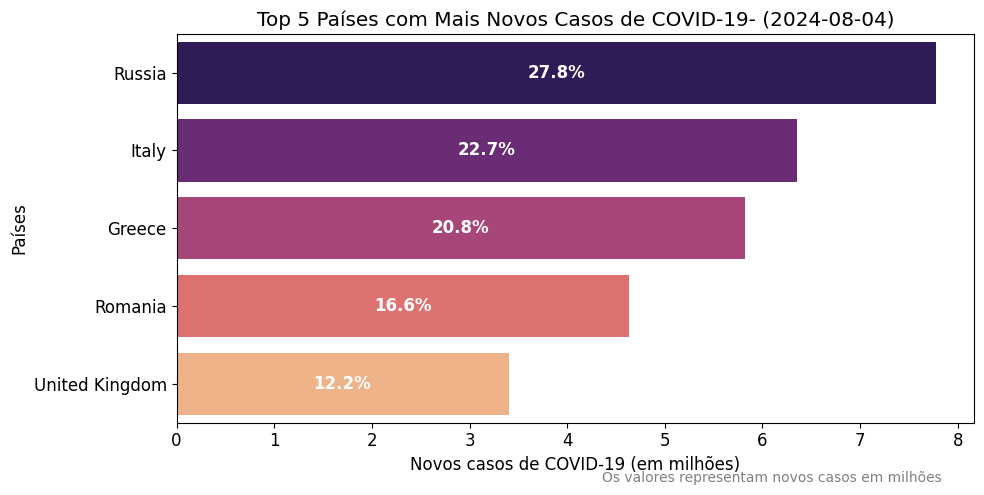

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker  # Para formatar os números

# Criando a figura
fig, ax1 = plt.subplots()

# Filtrando os países com mais novos casos na data mais recente
top_countries = df_covid.loc[df_covid.date == last_date].groupby('location').new_cases.sum().sort_values(ascending=False)[:5]

# Convertendo os valores para "casos por milhão"
x = top_countries.values / 1_000  # Convertendo para **milhares**
y = top_countries.index  # Países
total_cases_top5 = x.sum()  # Soma total dos novos casos nos top 5 países

# Criando o gráfico
ax1 = sns.barplot(x=x, y=y, ax=ax1, palette="magma")

# Adicionando os valores percentuais dentro das barras (com cor branca)
for index, value in enumerate(x):
    percentage = (value / total_cases_top5) * 100  # Calculando a porcentagem correta
    ax1.text(value * 0.5, index, f'{percentage:.1f}%', va='center', ha='center', color='white', fontweight='bold')

# Formatando os números no eixo X
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", ".")))

# Ajustes visuais
ax1.grid(False)
ax1.set_ylabel('Países')
ax1.set_xlabel('Novos casos de COVID-19 (em milhões)')
ax1.set_title(f"Top 5 Países com Mais Novos Casos de COVID-19- ({last_date})")

# Adicionando legenda explicativa
plt.figtext(0.95, 0.02, "Os valores representam novos casos em milhões", ha="right", fontsize=10, color="gray")

plt.tight_layout()
plt.show()


In [46]:
# Fazer uma cópia do DataFrame original
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
# Import the pandas library with the alias 'pd'
import pandas as pd
df = pd.read_csv(url)

df_covid = df.copy()

# Remover valores nulos da coluna 'total_deaths'
df_covid.dropna(subset=['total_deaths'], inplace=True)

# Criar a variável de percentual de mortes em relação à população
df_covid['percentual_mortes'] = df_covid['total_deaths'] / df_covid['population']

# Criar uma matriz de correlação
corr_df = df_covid[['aged_65_older', 'percentual_mortes', 'gdp_per_capita', 'total_deaths_per_million']].corr(method='pearson')

# Mostrar a matriz de correlação
display(corr_df)

,aged_65_older,percentual_mortes,gdp_per_capita,total_deaths_per_million
aged_65_older,1.000000,0.506679,0.510492,0.503190
percentual_mortes,0.506679,1.000000,0.215344,0.998419
gdp_per_capita,0.510492,0.215344,1.000000,0.208858
total_deaths_per_million,0.503190,0.998419,0.208858,1.000000


**📍 Há Correlação entre População Idosa e Mortes por COVID-19?**

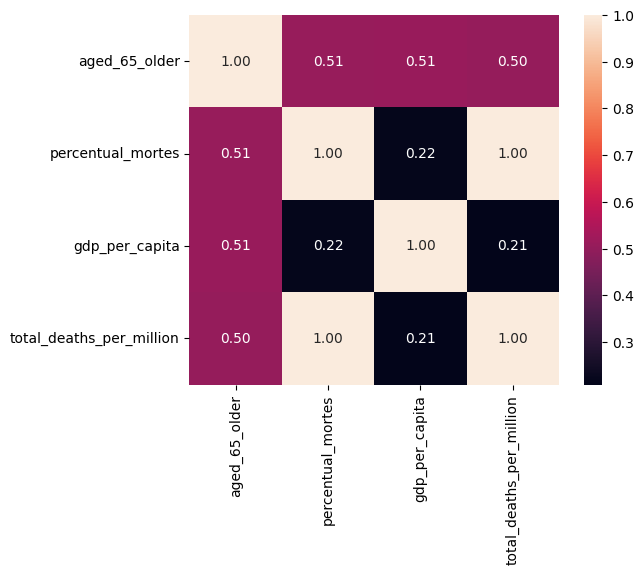

In [47]:

# plotar o gráfico de correlação
sns.heatmap(corr_df, fmt='.2f',square = True, annot = True);

In [15]:
# T-Calculado
import math  # Import the math module
r = 0.473442
r_2 = r ** 2
n = df_covid.shape[0]
print("R = ",r)
print("R² = ",round(r_2 * 100,2), "%")
print("N = ", n)
tc = (r * math.sqrt(n-2))/math.sqrt(1 - r_2) # Now you can use math.sqrt
print("Tc: ", round(tc,4))



R =  0.473442
R² =  22.41 %
N =  411804
Tc:  344.9224


**Gráfico de correlação entre idosos e casos de Covid**

In [19]:
# Import the necessary module
from scipy import stats

#graus de liberdade n-2 com 5% de signficância
t = stats.t.ppf(1-0.025, n - 2)
print ("Valor na t de student: ", round(t,2))

Valor na t de student:  1.96


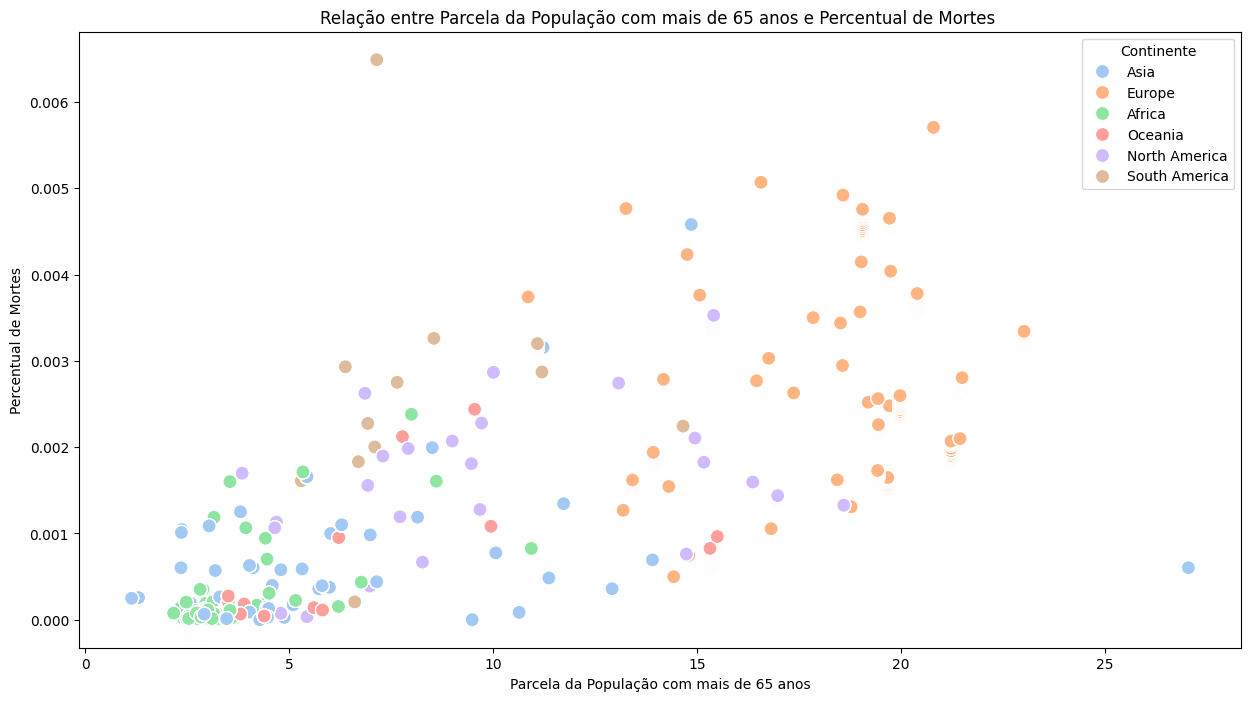

In [27]:
# Filtrando os dados a partir da última data disponível
df_filtrado = df_covid.loc[df_covid.date >= '2023-08-16']

# Criando a figura do gráfico e ajustando o tamanho
fig = plt.gcf()
fig.set_size_inches(15, 8)

# Plotando um gráfico de dispersão com paleta colorida
ax = sns.scatterplot(data=df_filtrado, x="aged_65_older", y="percentual_mortes", hue="continent", palette="pastel", s=100)

# Definindo os rótulos dos eixos
ax.set(xlabel='Parcela da População com mais de 65 anos', ylabel='Percentual de Mortes')

# Definindo o título do gráfico

ax.set_title(f"Relação entre Parcela da População com mais de 65 anos e Percentual de Mortes ")


# Desativando as grades no gráfico
ax.grid(False)

# Exibindo a legenda
ax.legend(title='Continente')

# Exibindo o gráfico
plt.show()



In [28]:
# variáveis necessárias para o cálculo
import math
r = 0.183923
r_2 = r ** 2
n = df_covid.shape[0]
print("R = ",r)
print("R² = ",round(r_2 * 100,2), "%")
print("N = ", n)


R =  0.183923
R² =  3.38 %
N =  411804


In [29]:

# T-Calculado
tc = (r * math.sqrt(n-2))/math.sqrt(1 - r_2)
print("Tc: ", round(tc,4))

Tc:  120.0751


In [30]:
# graus de liberdade n-2 com 5% de signficância.
t = stats.t.ppf(1-0.025, n - 2)
print ("Valor na t de student: ", round(t,2))

Valor na t de student:  1.96


**O PIB interfere nas mortes da doença?**

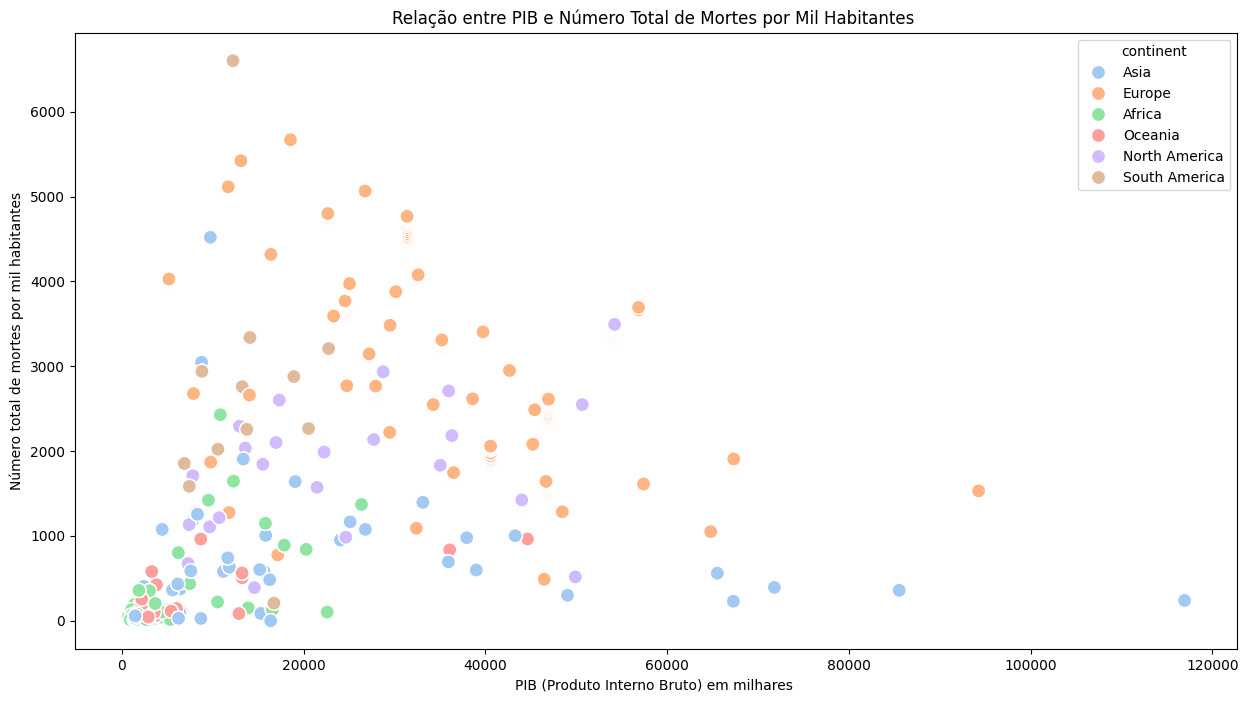

In [60]:
df_filtrado = df_covid.loc[df_covid.date >= '2023-08-16']
fig = plt.gcf()
fig.set_size_inches(15, 8)
ax = sns.scatterplot(data=df_filtrado, x="gdp_per_capita", y="total_deaths_per_million", hue="continent", palette="pastel", s=100)
ax.set(xlabel='PIB (Produto Interno Bruto) em milhares ', ylabel='Número total de mortes por mil habitantes')
ax.set_title(f"Relação entre PIB e Número Total de Mortes por Mil Habitantes ")
ax.grid(False)
plt.show()


# **Análise de dados: Brasil**#

## Nesta fase, concentraremos nossa análise no contexto brasileiro e procuraremos responder às seguintes questões:

- Qual foi a data do primeiro registro de caso de COVID-19 no Brasil?
- Qual foi a data do primeiro registro de morte por COVID-19 no Brasil?
- Gráfico da média móvel dos casos e óbitos por COVID-19 no Brasil.
- Gráfico de linha mostrando a evolução do número de pessoas vacinadas no Brasil.
- Gráfico de linha exibindo a progressão das doses de reforço administradas.
- Gráfico de dispersão relacionando o percentual de vacinados com o percentual de óbitos.
-
Comparação da média móvel de casos e óbitos no Brasil com o cenário global

In [34]:
# criar uma cópia do dataset original apenas com dados do Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()


# mostrar as cinco primeiras entradas
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
50234,BRA,South America,Brazil,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN
50235,BRA,South America,Brazil,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN
50236,BRA,South America,Brazil,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN
50237,BRA,South America,Brazil,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN
50238,BRA,South America,Brazil,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN


In [35]:
# verificar a quantidade valores ausentes
(df_brasil.isnull().sum() / df_brasil.shape[0]).sort_values(ascending=True)

,0
iso_code,0.0
population_density,0.0
median_age,0.0
aged_65_older,0.0
aged_70_older,0.0
...,...
icu_patients_per_million,1.0
icu_patients,1.0
tests_per_case,1.0
weekly_hosp_admissions_per_million,1.0


**Primeiro caso de COVID-19 confirmado no Brasil**

In [36]:

# exibir primeiro caso confirmado de COVID-19 no Brasil
df_brasil.loc[df_brasil['total_cases'] == df_brasil['total_cases'].min()]['date'].min()

'2020-01-05'

In [37]:
# exibir a data máxima e mínima de registro no Brasil
print(f'Data inicial dos registros: {df_brasil.date.min()}')
print(f'Data final dos registros: {df_brasil.date.max()}')

Data inicial dos registros: 2020-01-05
Data final dos registros: 2024-08-04


**Média de mortes e casos no país**

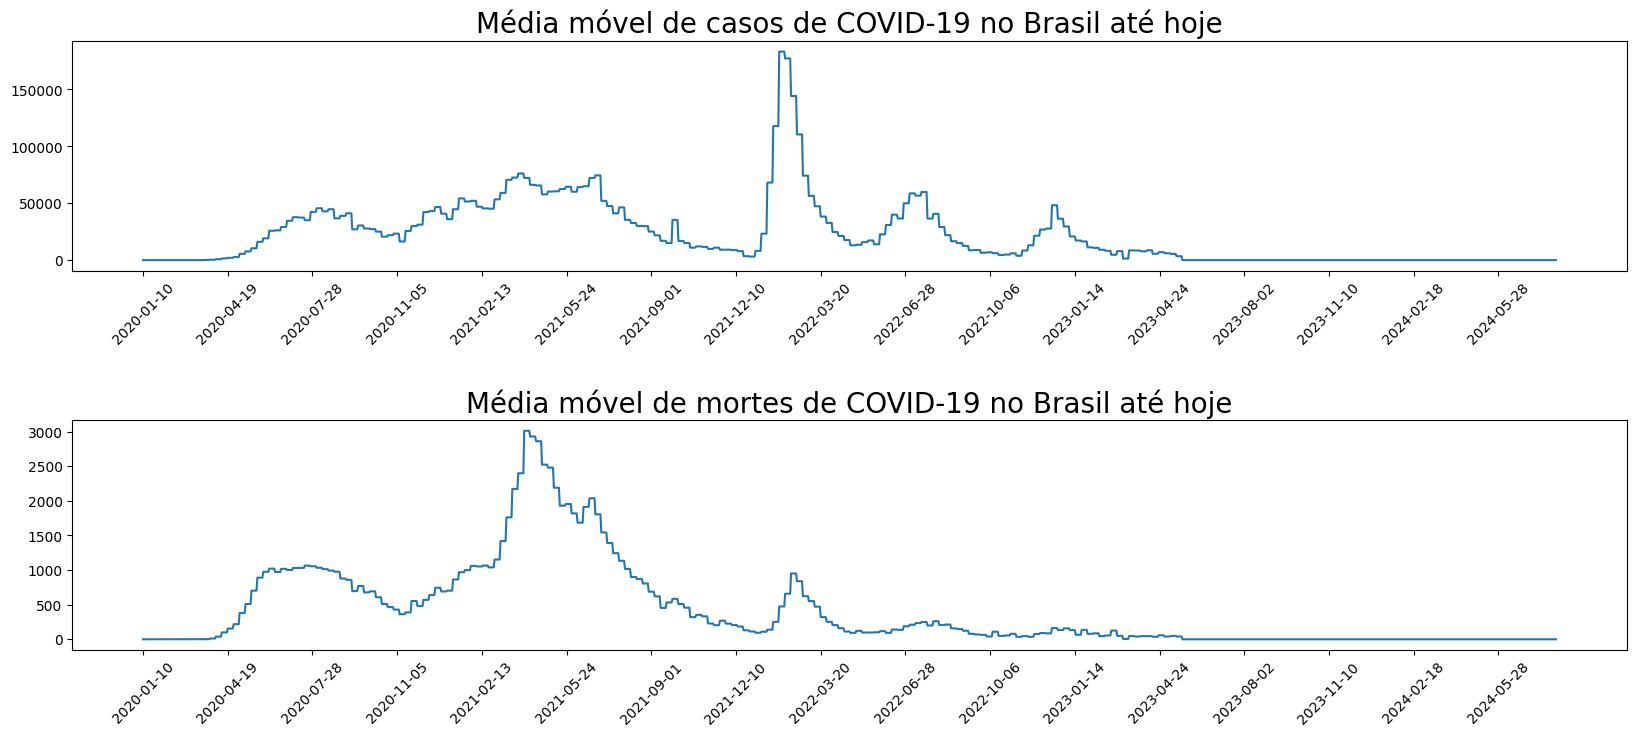

In [86]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(17, 8))

df_brasil_clean_new_cases_smoothed = df_brasil.dropna(subset=['new_cases_smoothed'])
df_brasil_clean_new_deaths_smoothed = df_brasil.dropna(subset=['new_deaths_smoothed'])

ax1.grid(False)
ax2.grid(False)

ax1.plot(df_brasil_clean_new_cases_smoothed['date'], df_brasil_clean_new_cases_smoothed['new_cases_smoothed'], label='Casos Confirmados')
last_date = df_brasil_clean_new_cases_smoothed['date'].max()
ax1.set_title(f"Média móvel de casos de COVID-19 no Brasil até hoje", fontsize=20);


ax2.plot(df_brasil_clean_new_deaths_smoothed['date'], df_brasil_clean_new_deaths_smoothed['new_deaths_smoothed'], label='Mortes')
last_date = df_brasil_clean_new_deaths_smoothed['date'].max()
ax2.set_title(f"Média móvel de mortes de COVID-19 no Brasil até hoje", fontsize=20);
# Melhorando o eixo X
ax1.set_xticks(df_brasil_cleaned['date'][::100])
# Melhorando o eixo X
ax2.set_xticks(df_brasil_cleaned['date'][::100])

# Aplica rotação e tamanho da fonte diretamente no eixo
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, fontsize=10)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, fontsize=10)

plt.tight_layout(pad = 3.0);

**Porcentagem de doses vacina**

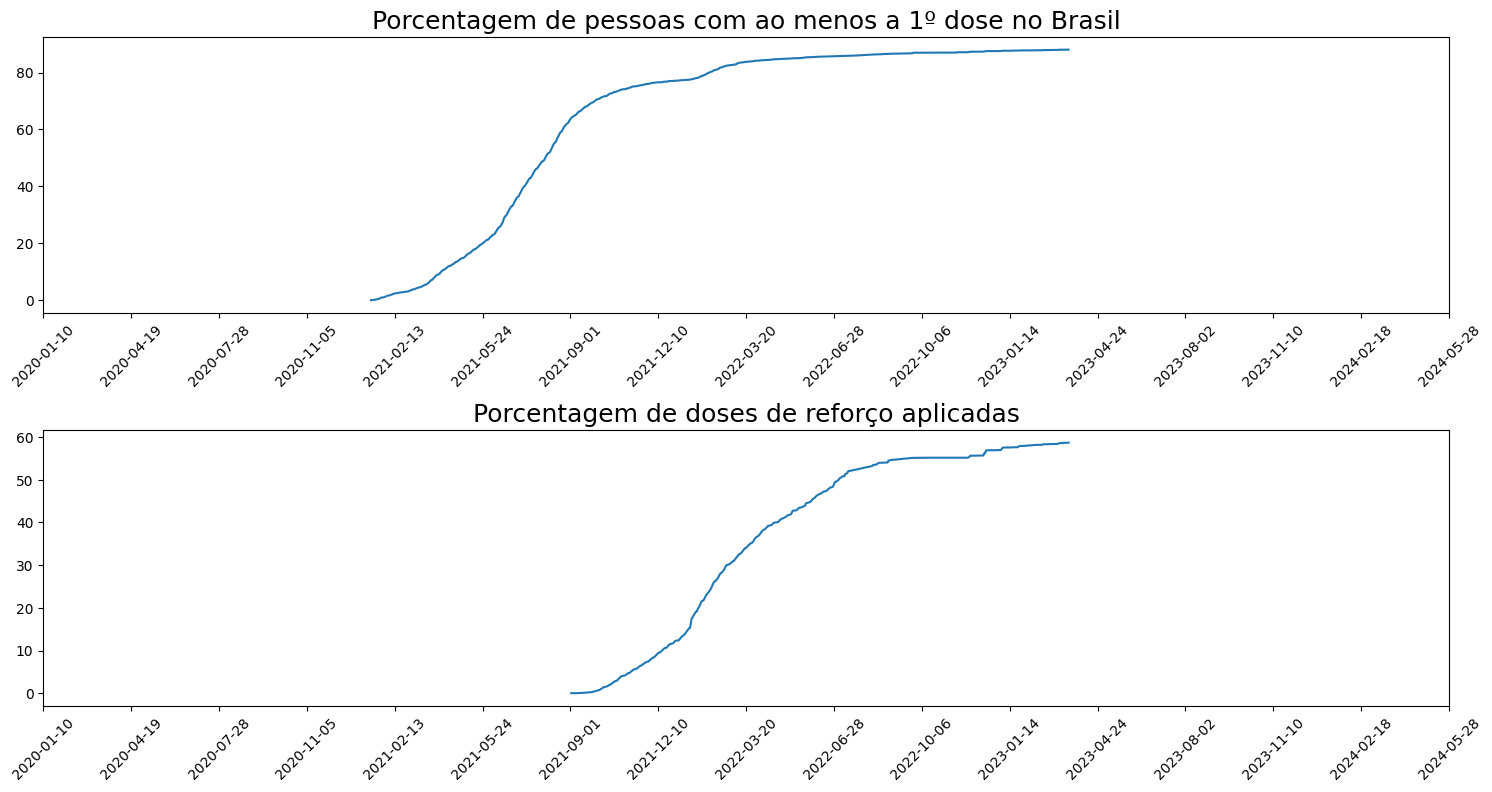

In [85]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(15, 8))
df_brasil['date'] = pd.to_datetime(df_brasil['date'])


df_brasil_clean_people_vaccinated_per_hundred = df_brasil.dropna(subset=['people_vaccinated_per_hundred'])
df_brasil_clean_total_boosters_per_hundred = df_brasil.dropna(subset=['total_boosters_per_hundred'])

ax1.grid(False)
ax2.grid(False)

ax1.plot(df_brasil_clean_people_vaccinated_per_hundred['date'], df_brasil_clean_people_vaccinated_per_hundred['people_vaccinated_per_hundred'])
ax1.set_title(f"Porcentagem de pessoas com ao menos a 1º dose no Brasil", fontsize=18);

ax2.plot(df_brasil_clean_total_boosters_per_hundred['date'], df_brasil_clean_total_boosters_per_hundred['total_boosters_per_hundred'])
ax2.set_title(f"Porcentagem de doses de reforço aplicadas", fontsize=18);
# Melhorando o eixo X
ax1.set_xticks(df_brasil_cleaned['date'][::100])
# Melhorando o eixo X
ax2.set_xticks(df_brasil_cleaned['date'][::100])

# Aplica rotação e tamanho da fonte diretamente no eixo
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, fontsize=10)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, fontsize=10)

plt.tight_layout(pad = 1.0);


In [41]:
# fazer uma cópia do dataframe
df_corr = df_brasil

# criar variável que é o número de mortes por número de casos
div_column = df_corr['total_deaths']/df_corr['total_cases']
df_corr['percentual_mortes'] = div_column

# criar variável que é o número de pessoas vacinadas pela população
div_column = df_corr['people_vaccinated']/df_corr['population']
df_corr['percentual_vacinados'] = div_column

# criar uma matriz de correlação
corr_df = df_corr[['percentual_mortes', 'percentual_vacinados']].corr(method='pearson');

# mostrar a matriz de correlação
display(corr_df);

,percentual_mortes,percentual_vacinados
percentual_mortes,1.000000,-0.513392
percentual_vacinados,-0.513392,1.000000


**Relação vacinados e mortes**

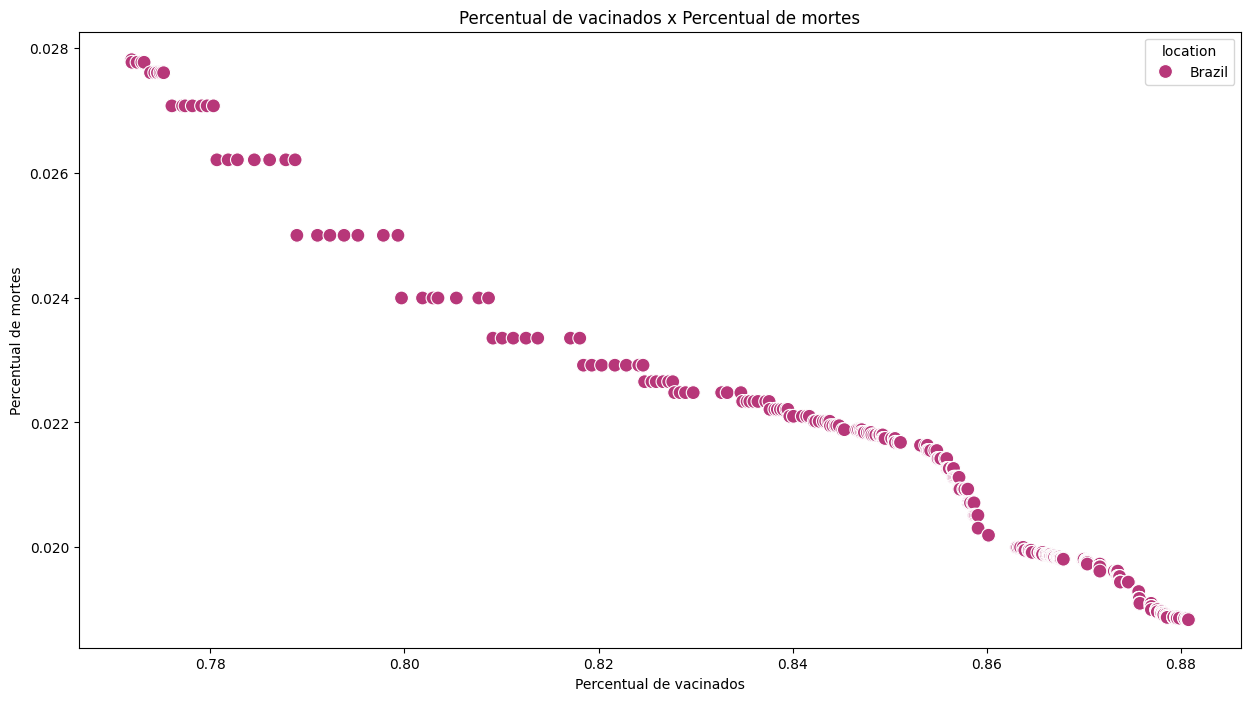

In [42]:
df_filtrado = df_brasil.loc[df_brasil.date >= '2022-01-01']
fig = plt.gcf()

fig.set_size_inches(15, 8)

ax = sns.scatterplot(data=df_filtrado, x="percentual_vacinados", y="percentual_mortes", hue="location",  palette="magma", s = 100)
ax.set(xlabel='Percentual de vacinados', ylabel='Percentual de mortes')
ax.set_title("Percentual de vacinados x Percentual de mortes")
ax.grid(False)
plt.show()

**Comparação COVID-19: Brasil X Mundo**

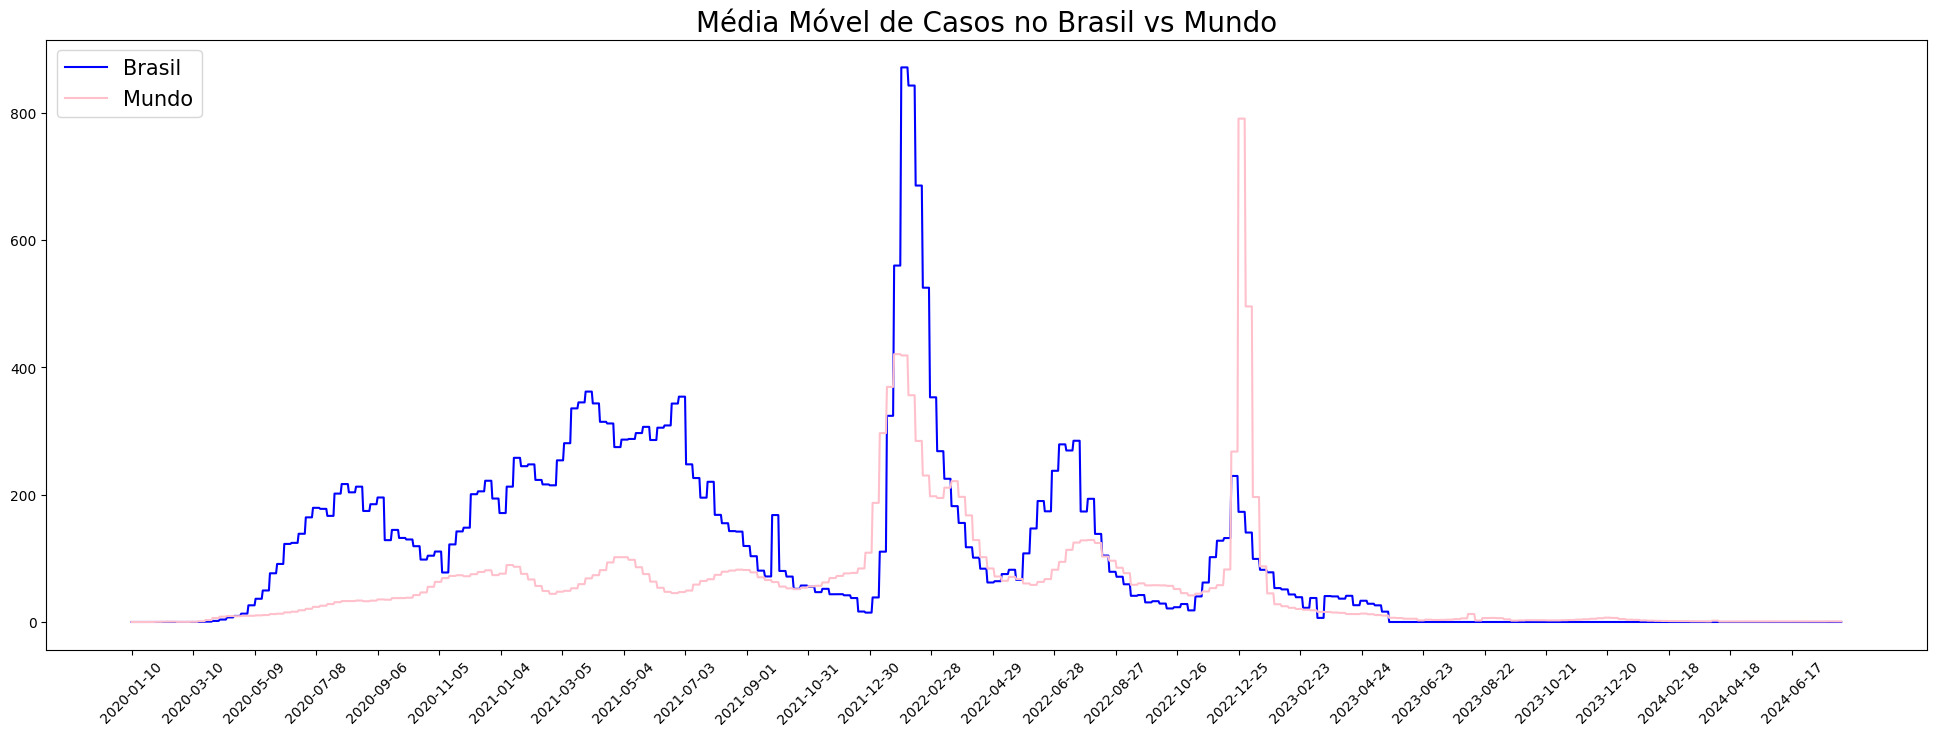

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Criando a figura
fig, ax = plt.subplots(figsize=(20, 8))

# Filtrando os dados
mundo = df.loc[df.location == 'World', ['date', 'new_cases_smoothed_per_million']].dropna()
df_brasil_cleaned = df_brasil.dropna(subset=['new_cases_smoothed_per_million'])

# Removendo a grade
ax.grid(False)

# Plotando os dados
ax.plot(df_brasil_cleaned['date'], df_brasil_cleaned['new_cases_smoothed_per_million'], label='Brasil', c='blue')
ax.plot(mundo['date'], mundo['new_cases_smoothed_per_million'], label='Mundo', c='pink')

# Melhorando o eixo X
ax.set_xticks(df_brasil_cleaned['date'][::60])  # Exibir um rótulo a cada 60 dias
plt.xticks(rotation=45)

# Títulos e legenda
ax.set_title('Média Móvel de Casos no Brasil vs Mundo', fontsize=20)
plt.legend(loc='upper left', prop={'size': 15})

plt.tight_layout(pad=3.0)
plt.show()
